In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
## Importing face mask dataset
!kaggle datasets download -d omkargurav/face-mask-dataset

100% 163M/163M [00:03<00:00, 67.8MB/s]
100% 163M/163M [00:03<00:00, 54.9MB/s]


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

 data  'download (1).jpeg'   face-mask-dataset.zip   kaggle.json   sample_data


In [ ]:
## Importing the dependencies
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print (with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1674.jpg', 'with_mask_1201.jpg', 'with_mask_2849.jpg', 'with_mask_745.jpg', 'with_mask_2850.jpg']
['with_mask_2196.jpg', 'with_mask_1200.jpg', 'with_mask_1967.jpg', 'with_mask_175.jpg', 'with_mask_1678.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print (without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3756.jpg', 'without_mask_2281.jpg', 'without_mask_2372.jpg', 'without_mask_3427.jpg', 'without_mask_3531.jpg']
['without_mask_3569.jpg', 'without_mask_2462.jpg', 'without_mask_3724.jpg', 'without_mask_2136.jpg', 'without_mask_672.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

In [ ]:
## creating labels for the two class of images
# with_mask=1
# without_mask=0
with_mask_label=[1]*3725
without_mask_label=[0]*3828

In [ ]:
print(with_mask_label[0:5])
print(without_mask_label[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_label))
print(len(without_mask_label))

3725
3828


In [ ]:
labels=with_mask_label + without_mask_label
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


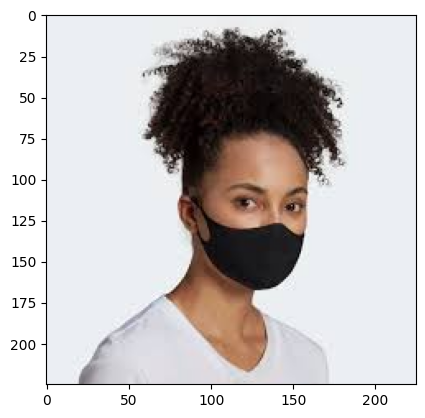

In [ ]:
# Displaying the images
# display with mask image
img=mpimg.imread('/content/data/with_mask/with_mask_2307.jpg')
imgplot = plt.imshow(img)
plt.show()

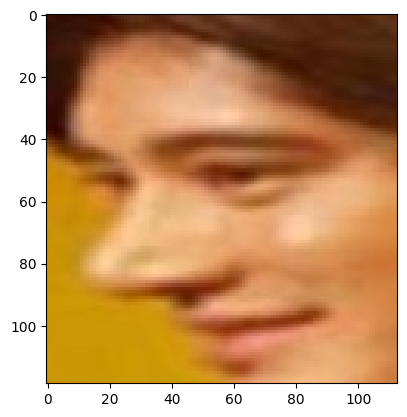

In [ ]:
# display without mask image
img=mpimg.imread('/content/data/without_mask/without_mask_505.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# As images are of differnent size we need to take care of this during image processing
#IMAGE PROCESSING
#1. Resize image
#2. convert images to numpy arrays



In [ ]:
# convert images to numpy arrays
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



  without_mask_path = '/content/data/without_mask/'



for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)






/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
data[0]


array([[[240, 236, 211],
        [240, 235, 216],
        [243, 237, 223],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[239, 237, 211],
        [238, 235, 216],
        [244, 241, 226],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[238, 239, 213],
        [241, 241, 221],
        [245, 245, 230],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       ...,

       [[134,  70,  40],
        [133,  68,  45],
        [133,  68,  49],
        ...,
        [225,  23,  40],
        [229,  27,  43],
        [235,  32,  43]],

       [[139,  75,  46],
        [139,  74,  52],
        [139,  74,  53],
        ...,
        [220,  19,  44],
        [226,  24,  41],
        [235,  33,  38]],

       [[135,  69,  47],
        [140,  73,  53],
        [139,  73,  52],
        ...,
        [216,  18,  36],
        [227,  28,  35],
        [234,  35,  32]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

In [ ]:
len(data)

7553

In [ ]:
# converting image list and label list to numpy arrays

X=np.array(data)
Y=np.array(labels)

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

In [ ]:
print(Y)

In [ ]:
# Split train test


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [ ]:
X_train_scaled[0]

array([[[0.40784314, 0.37254902, 0.35294118],
        [0.40784314, 0.37254902, 0.34901961],
        [0.4       , 0.36470588, 0.34509804],
        ...,
        [0.15294118, 0.1372549 , 0.1254902 ],
        [0.16078431, 0.14509804, 0.13333333],
        [0.16470588, 0.14901961, 0.1372549 ]],

       [[0.36078431, 0.3254902 , 0.30588235],
        [0.36078431, 0.3254902 , 0.30980392],
        [0.36470588, 0.32941176, 0.31372549],
        ...,
        [0.15686275, 0.14117647, 0.12941176],
        [0.16470588, 0.14901961, 0.1372549 ],
        [0.16862745, 0.15294118, 0.14117647]],

       [[0.32941176, 0.29803922, 0.27843137],
        [0.32941176, 0.29803922, 0.28235294],
        [0.33333333, 0.29411765, 0.28627451],
        ...,
        [0.17647059, 0.16078431, 0.14901961],
        [0.18431373, 0.16862745, 0.15686275],
        [0.18823529, 0.17254902, 0.16078431]],

       ...,

       [[0.87843137, 0.91372549, 0.90196078],
        [0.87058824, 0.90588235, 0.89803922],
        [0.85882353, 0

In [ ]:
# Now image processing part is completed , now lets build the convolution neural network(CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2
model=keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))


In [ ]:
# compile neural network setting optimisation and loss fn.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
# training the neural network
history=model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 148s 860ms/step - loss: 0.4354 - acc: 0.8244 - val_loss: 0.2999 - val_acc: 0.8727
Epoch 2/5
170/170 [==============================] - 147s 863ms/step - loss: 0.2690 - acc: 0.8933 - val_loss: 0.2715 - val_acc: 0.8826
Epoch 3/5
170/170 [==============================] - 143s 841ms/step - loss: 0.2217 - acc: 0.9080 - val_loss: 0.2437 - val_acc: 0.9074
Epoch 4/5
170/170 [==============================] - 144s 848ms/step - loss: 0.1907 - acc: 0.9272 - val_loss: 0.2367 - val_acc: 0.9124
Epoch 5/5
170/170 [==============================] - 143s 844ms/step - loss: 0.1694 - acc: 0.9308 - val_loss: 0.3414 - val_acc: 0.8860


In [ ]:

# Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =' , accuracy)

48/48 [==============================] - 11s 226ms/step - loss: 0.2932 - acc: 0.8994
Test Accuracy = 0.8994043469429016


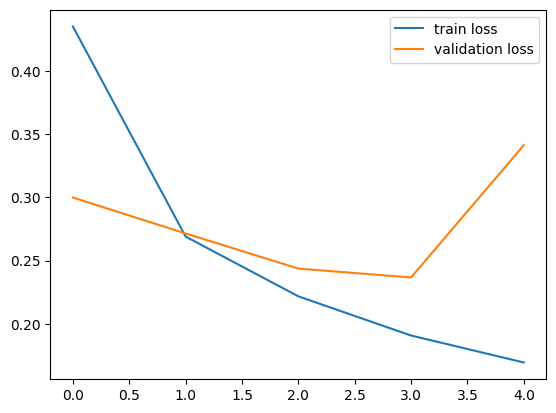

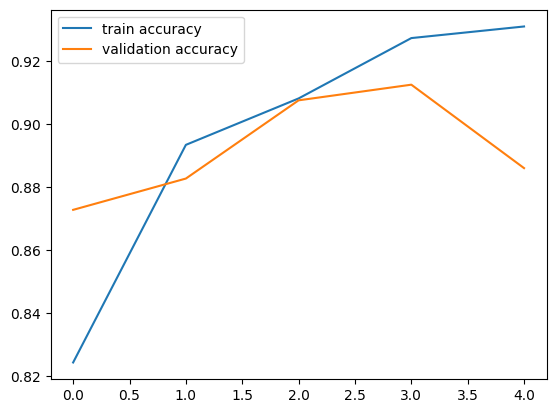

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()



In [ ]:

# Predictive System

Path of the image to be predicted: /content/aa-Cover-mvd0kon6ouhjk5v998n04dph11-20200424191015.jpeg


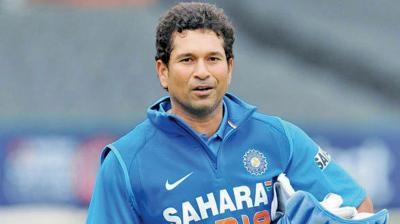

1/1 [==============================] - 0s 57ms/step
[[0.71102834 0.33205062]]
0
The person is not masked


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped= np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if (input_pred_label == 1):

  print('The person in the image is wearing a mask')

else:

  print('The person is not masked')

